# PHYS 331 – Numerical Techniques for the Sciences I
## Homework 7: Fourier transforms I
### Problem 3 -  Slow DFT (15 points)
---
Name: *Viktorya Hunanyan*

Onyen: *730707661*

Cell for *Problem 3* is below.

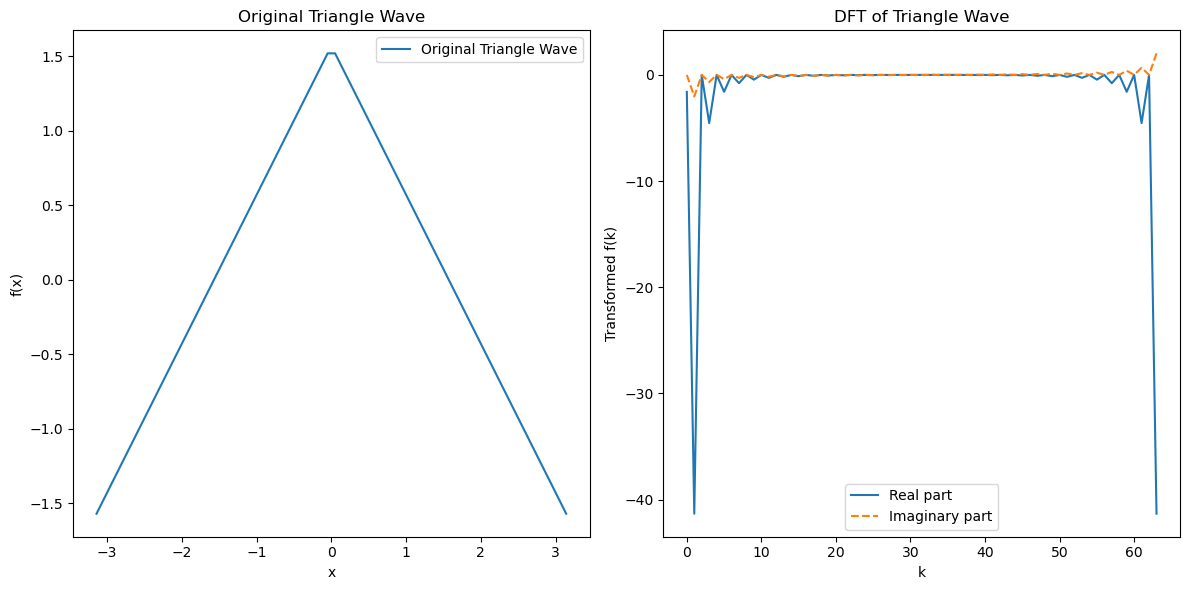

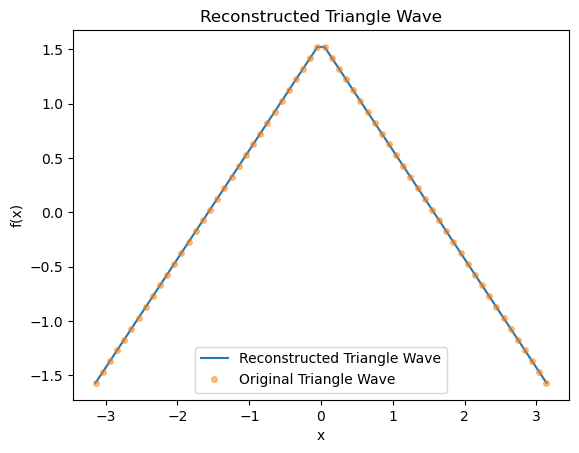

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sdft(array, direction="forward"):
    """
    Calculates the forward or backward discrete Fourier transform of a function defined on an array.
    
    PARAMETERS:
        array : np.ndarray
            Input one-dimensional array (signal) to transform.
        
        direction : str
            Direction of the transform, either "forward" or "backward".
             
    RETURNS:
        np.ndarray
            The transformed array.
    """
    N = len(array)
    transformed = np.zeros(N, dtype=complex)
    
    for k in range(N):
        for n in range(N):
            angle = 2 * np.pi * k * n / N
            if direction == "forward":
                transformed[k] += array[n] * np.exp(-1j * angle)
            elif direction == "backward":
                transformed[k] += array[n] * np.exp(1j * angle)
        
        if direction == "backward":
            transformed[k] /= N
    
    return transformed

def trwave(x):
    """
    Calculates the triangle-wave function.
    
    PARAMETERS:
        x -- input (numpy array or scalar);
             
    RETURNS:
        Triangle wave function evaluated at x.
    """
    wave = np.zeros_like(x)
    wave[(x >= -np.pi) & (x <= 0)] = (np.pi / 2) + x[(x >= -np.pi) & (x <= 0)]
    wave[(x > 0) & (x <= np.pi)] = (np.pi / 2) - x[(x > 0) & (x <= np.pi)]
    
    return wave

def main():
    # Define the input parameters
    N = 64
    x = np.linspace(-np.pi, np.pi, N)
    function = trwave(x)  # Using the triangle wave function

    # Forward DFT
    transformed = sdft(function, direction="forward")

    # Inverse DFT
    inverse_transformed = sdft(transformed, direction="backward")

    plt.figure(figsize=(12, 6))

    # Original function
    plt.subplot(1, 2, 1)
    plt.plot(x, function, label='Original Triangle Wave')
    plt.title('Original Triangle Wave')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()

    # Transformed function (real and imaginary parts)
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(N), transformed.real, label='Real part')
    plt.plot(np.arange(N), transformed.imag, label='Imaginary part', linestyle='--')
    plt.title('DFT of Triangle Wave')
    plt.xlabel('k')
    plt.ylabel('Transformed f(k)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Verify reconstruction
    plt.figure()
    plt.plot(x, inverse_transformed.real, label='Reconstructed Triangle Wave')
    plt.plot(x, function, 'o', label='Original Triangle Wave', markersize=4, alpha=0.5)
    plt.title('Reconstructed Triangle Wave')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

main()